In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [3]:
df.loc[:, 'salary_rate':'salary_hour_avg'].dropna(subset='salary_rate')

,salary_rate,salary_year_avg,salary_hour_avg
28,year,109500.0,NaN
43,hour,NaN,97.5
51,hour,NaN,72.5
77,year,140000.0,NaN
92,year,120000.0,NaN
...,...,...,...
785624,year,139216.0,NaN
785641,year,150000.0,NaN
785648,year,221875.0,NaN
785682,year,157500.0,NaN


In [4]:
median_salary_year = df['salary_year_avg'].median()

In [5]:
median_salary_hour = df['salary_hour_avg'].median()

In [6]:
df_filled = df

df_filled['salary_year_avg']= df_filled['salary_year_avg'].fillna(median_salary_year)
df_filled['salary_hour_avg']= df_filled['salary_hour_avg'].fillna(median_salary_hour)

In [7]:
df_filled.loc[:10, 'salary_year_avg':'salary_hour_avg']

,salary_year_avg,salary_hour_avg
0,115000.0,45.98
1,115000.0,45.98
2,115000.0,45.98
3,115000.0,45.98
4,115000.0,45.98
5,115000.0,45.98
6,115000.0,45.98
7,115000.0,45.98
8,115000.0,45.98
9,115000.0,45.98


In [8]:
df_unique = df_filled

df_unique= df_unique.drop_duplicates()

print('Length of original df:', len(df_filled))
print('Lenght of drop diplicates df:', len(df_unique))
print('Rows dropped:', len(df_filled)-len(df_unique))

Length of original df: 785741
Lenght of drop diplicates df: 785640
Rows dropped: 101


In [9]:
df_unique = df_unique.drop_duplicates(subset=['job_title','company_name']) #We drop the jobs with the same name from the same company

print('Length of original df:', len(df_filled))
print('Lenght of drop diplicates df:', len(df_unique))
print('Rows dropped:', len(df_filled)-len(df_unique))

Length of original df: 785741
Lenght of drop diplicates df: 508042
Rows dropped: 277699


In [10]:
r1 = [2, 4, 6, 8]
r2 = lambda x: x**2
result = list(map(r2, r1))
print(result)  # [4, 16, 36, 64]


[4, 16, 36, 64]


In [11]:
df.sample(5, random_state=12) # Gives us n random samples out of the DF, different each execute unless u specify a random_state

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
589126,Data Scientist,Machine Learning Data Scientist - Python / R |...,"Arlington, VA",via LinkedIn,Full-time,False,"New York, United States",2023-06-06 09:02:57,False,False,United States,None,115000.0,45.98,Deloitte,"['python', 'java', 'r', 'sql', 'nosql', 'hadoo...","{'analyst_tools': ['tableau', 'qlik'], 'librar..."
273196,Data Analyst,Data Analytic/desarrollador Etl,"Buenos Aires, Argentina",via BeBee,Full-time,False,Argentina,2023-06-17 08:02:11,False,False,Argentina,None,115000.0,45.98,Neoris,"['sql', 'python', 'azure', 'dax']","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
108362,Data Engineer,Data Lead & Data Engineer,India,via Jobrapido.com,Full-time,False,India,2023-12-09 00:11:01,True,False,India,None,115000.0,45.98,SwiftWIN | A Concord Company,"['sql', 'python', 'azure', 'databricks', 'ssis']","{'analyst_tools': ['ssis'], 'cloud': ['azure',..."
56780,Senior Data Scientist,Senior Data Scientist Europe,Anywhere,via LinkedIn,Full-time,True,Belgium,2023-04-26 07:33:42,False,False,Belgium,None,115000.0,45.98,DataStories®,"['python', 'sql', 'postgresql', 'sql server', ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."
159504,Data Engineer,Data Engineer (12000 USD/Mes) [Remote],Anywhere,via LinkedIn,Full-time,True,Mexico,2023-09-03 08:39:25,False,False,Mexico,None,115000.0,45.98,Listopro,"['python', 'sql', 'aws', 'gcp', 'scikit-learn'...","{'cloud': ['aws', 'gcp'], 'libraries': ['sciki..."


In [12]:
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

In [13]:
df_altered = df_original.copy() # we use copy to not change the original

In [14]:
print('ID of df_original:    ', id(df_original))
print('ID of df_altered:     ', id(df_altered))
print('Are the two DFs the same?' , id(df_original)==id(df_altered))

ID of df_original:     3047993952592
ID of df_altered:      3047993952976
Are the two DFs the same? False


In [15]:
df_job_country_salary = df_original.pivot_table(values='salary_year_avg',index='job_country' ,columns='job_title_short', aggfunc='median')
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [16]:
top_countries = df_original['job_country'].value_counts().head(6).index
print(top_countries)

df_job_country_salary = df_job_country_salary.loc[top_countries]


job_titles = ['Data Analyst','Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_titles]

df_job_country_salary


Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object', name='job_country')


job_title_short,Data Analyst,Data Engineer,Data Scientist
job_country,,,
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


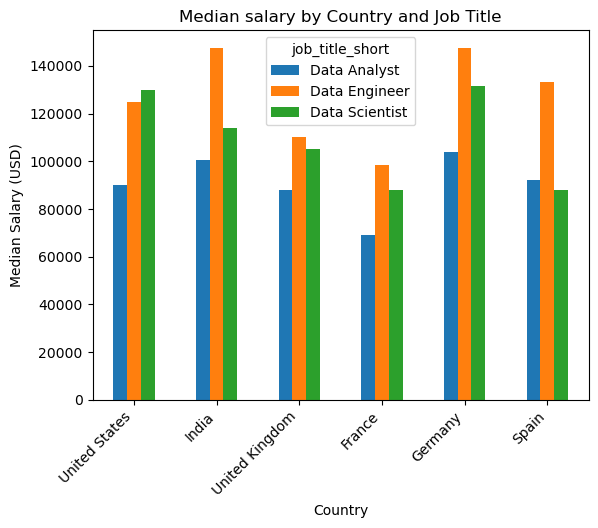

In [17]:
df_job_country_salary.plot(kind='bar')
plt.ylabel('Median Salary (USD)')
plt.xlabel('Country')
plt.title('Median salary by Country and Job Title')
plt.xticks(rotation=45 ,ha='right')
plt.show()

In [18]:
df_original.index.name = 'job_index'

In [19]:
df_original.head() 

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [31]:
df_usa = df_original[df_original['job_country'] == 'United States'].copy()

In [32]:
df_usa.head() # Now the index is not in order so we need to reset it

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [33]:
df_usa.reset_index(inplace=True)

In [34]:
df_usa.head()

,job_index,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
2,5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
3,6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
4,9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [35]:
df_usa.set_index('job_index',inplace=True) # drops the index we created previously and replaces it

In [36]:
df_usa.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
job_index,,,,,,,,,,,,,,,,,
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"['python', 'sql', 'gcp']","{'cloud': ['gcp'], 'programming': ['python', '..."
6,Senior Data Engineer,Senior Data Engineer - GCP Cloud,"Dearborn, MI",via LinkedIn,Full-time,False,"Florida, United States",2023-03-27 13:18:18,False,False,United States,None,NaN,NaN,"Miracle Software Systems, Inc","['sql', 'python', 'java', 'sql server', 'gcp',...","{'cloud': ['gcp', 'bigquery'], 'databases': ['..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","['sql', 'python', 'r', 'mongodb', 'mongodb', '...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."


In [ ]:
median_pivot = df_usa.pivot_table(values='salary_year_avg', index='job_title_short' , aggfunc=['median','min','max'])
median_pivot.sort_values(by=('median','salary_year_avg'),ascending=False)

,median,min,max
,salary_year_avg,salary_year_avg,salary_year_avg
job_title_short,,,
Senior Data Scientist,155000.0,55000.0,475000.0
Machine Learning Engineer,150000.0,44408.5,315000.0
Senior Data Engineer,150000.0,45000.0,375000.0
Data Scientist,130000.0,30000.0,960000.0
Software Engineer,130000.0,48982.0,375000.0
Data Engineer,125000.0,23496.0,525000.0
Cloud Engineer,116100.0,42000.0,221844.0
Senior Data Analyst,110000.0,35360.0,425000.0


In [38]:
median_pivot.sort_index(inplace=True) # Sorts in alphabetical order